# Tutorial Machine Learning: K-Nearest Neighbors (KNN)

Selamat datang di tutorial tentang algoritma K-Nearest Neighbors! KNN adalah salah satu algoritma machine learning yang paling sederhana namun powerful untuk klasifikasi dan regresi.

## Daftar Isi:
1. Pengenalan KNN
   - Apa itu KNN?
   - Cara Kerja KNN
   - Kelebihan dan Kekurangan
2. Konsep Dasar
   - Distance Metrics
   - Pemilihan Nilai K
   - Voting Mechanism
3. Implementasi dengan Python
   - KNN untuk Klasifikasi
   - KNN untuk Regresi
4. Parameter Tuning
   - Cross-Validation
   - Grid Search
5. Studi Kasus
6. Latihan

Mari kita mulai!

## 1. Pengenalan KNN

### Apa itu KNN?
K-Nearest Neighbors (KNN) adalah algoritma machine learning yang:
- Termasuk dalam supervised learning
- Dapat digunakan untuk klasifikasi dan regresi
- Berbasis pada prinsip "similarity" atau kemiripan antar data
- Non-parametric (tidak membuat asumsi tentang distribusi data)

### Cara Kerja KNN:
1. Hitung jarak antara data baru dengan semua data training
2. Pilih K tetangga terdekat
3. Untuk klasifikasi: voting mayoritas
4. Untuk regresi: rata-rata nilai

### Kelebihan:
- Sederhana dan mudah diimplementasi
- Tidak perlu training model
- Bekerja baik dengan data multi-class
- Tidak ada asumsi tentang data

### Kekurangan:
- Komputasi berat saat prediksi
- Membutuhkan banyak memori
- Sensitif terhadap fitur yang tidak relevan
- Perlu scaling fitur

Mari kita implementasikan KNN dengan Python:

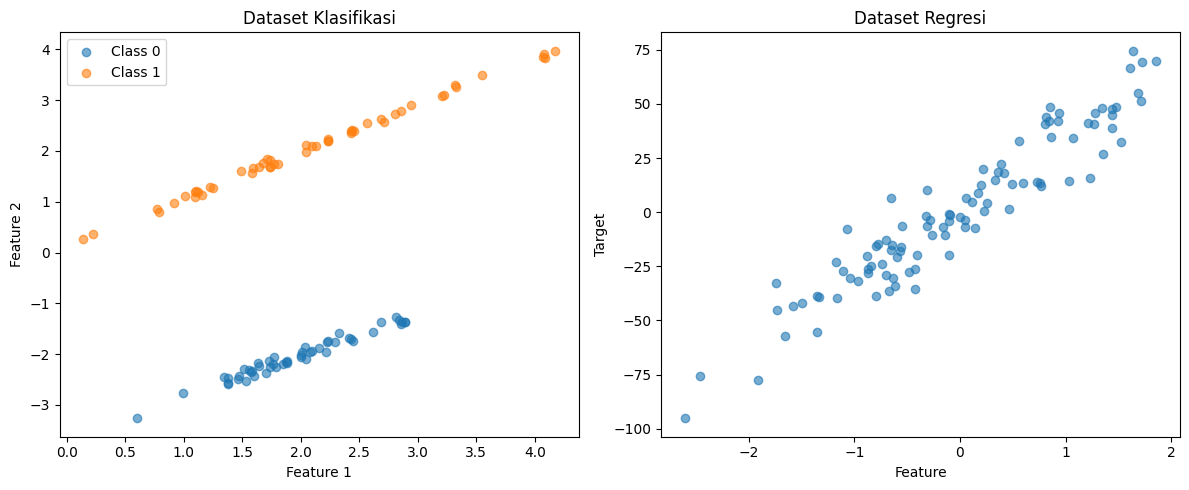

Hasil Evaluasi KNN Classifier:
--------------------------------------------------
Accuracy: 1.0000

Confusion Matrix:
[[13  0]
 [ 0  7]]

Hasil Evaluasi KNN Regressor:
--------------------------------------------------
MSE: 76.1076
RMSE: 8.7240


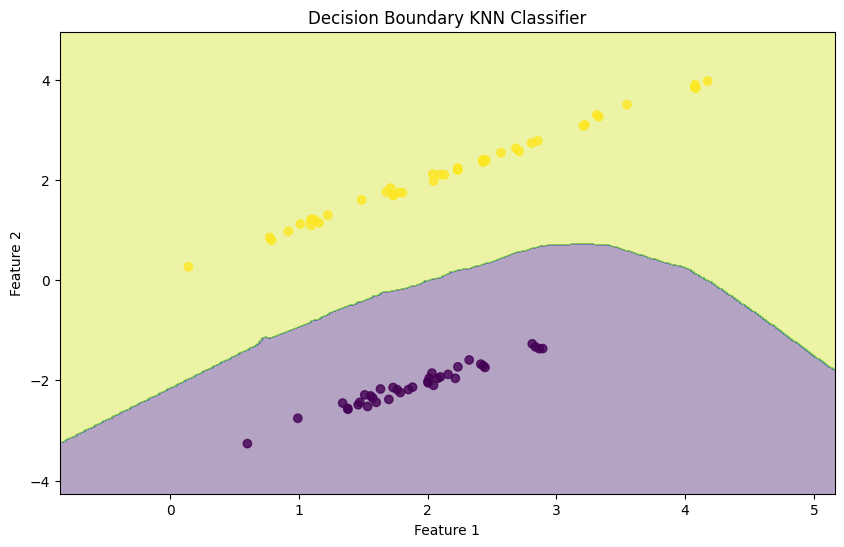

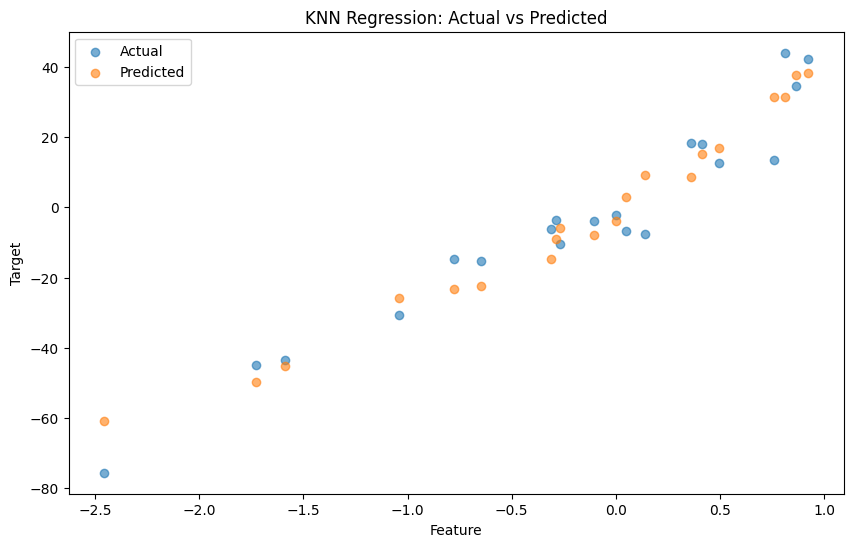

In [4]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.datasets import make_classification, make_regression

# Set random seed untuk reproduktifitas
np.random.seed(42)

# 1. Membuat dataset klasifikasi
X_class, y_class = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=2
)

# 2. Membuat dataset regresi
X_reg, y_reg = make_regression(
    n_samples=100,
    n_features=1,
    noise=10
)

# Visualisasi dataset klasifikasi
plt.figure(figsize=(12, 5))

# Plot data klasifikasi
plt.subplot(121)
plt.scatter(X_class[y_class==0, 0], X_class[y_class==0, 1], 
            label='Class 0', alpha=0.6)
plt.scatter(X_class[y_class==1, 0], X_class[y_class==1, 1], 
            label='Class 1', alpha=0.6)
plt.title('Dataset Klasifikasi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot data regresi
plt.subplot(122)
plt.scatter(X_reg, y_reg, alpha=0.6)
plt.title('Dataset Regresi')
plt.xlabel('Feature')
plt.ylabel('Target')

plt.tight_layout()
plt.show()

# Split data klasifikasi
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Split data regresi
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scaling data
scaler_class = StandardScaler()
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

# Implementasi KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_class_scaled, y_train_class)
y_pred_class = knn_clf.predict(X_test_class_scaled)

# Implementasi KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg_scaled)

# Evaluasi model klasifikasi
print("Hasil Evaluasi KNN Classifier:")
print("-" * 50)
print(f"Accuracy: {accuracy_score(y_test_class, y_pred_class):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

# Evaluasi model regresi
print("\nHasil Evaluasi KNN Regressor:")
print("-" * 50)
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")

# Visualisasi decision boundary untuk klasifikasi
def plot_decision_boundary(X, y, model, scaler):
    h = 0.02  # step size in the mesh
    
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                        np.arange(y_min, y_max, h))
    
    # Scale the mesh grid
    mesh_scaled = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    
    # Make predictions on mesh grid
    Z = model.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title('Decision Boundary KNN Classifier')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary
plot_decision_boundary(X_train_class, y_train_class, knn_clf, scaler_class)

# Visualisasi prediksi regresi
plt.figure(figsize=(10, 6))
plt.scatter(X_test_reg, y_test_reg, label='Actual', alpha=0.6)
plt.scatter(X_test_reg, y_pred_reg, label='Predicted', alpha=0.6)
plt.title('KNN Regression: Actual vs Predicted')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

## 2. Distance Metrics dan Pemilihan K

### Distance Metrics
KNN menggunakan berbagai metrik jarak untuk mengukur kedekatan antar data:

1. **Euclidean Distance**
   - Paling umum digunakan
   - \[ d(p,q) = \sqrt{\sum_{i=1}^n (p_i - q_i)^2} \]

2. **Manhattan Distance**
   - Cocok untuk data grid/kota
   - \[ d(p,q) = \sum_{i=1}^n |p_i - q_i| \]

3. **Minkowski Distance**
   - Generalisasi dari Euclidean dan Manhattan
   - \[ d(p,q) = (\sum_{i=1}^n |p_i - q_i|^r)^{1/r} \]

### Pemilihan Nilai K
Nilai K sangat mempengaruhi performa model:
- K terlalu kecil: overfitting, sensitif terhadap noise
- K terlalu besar: underfitting, bias tinggi
- K sebaiknya ganjil (untuk klasifikasi binary)
- Rule of thumb: K ≈ √n (n = jumlah data training)

Mari kita lihat pengaruh nilai K terhadap performa model:

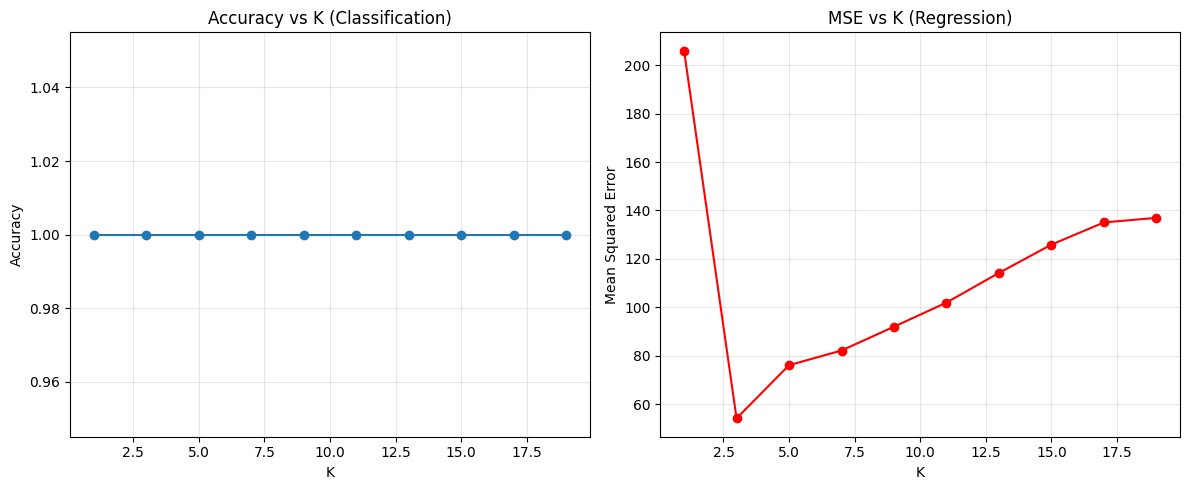

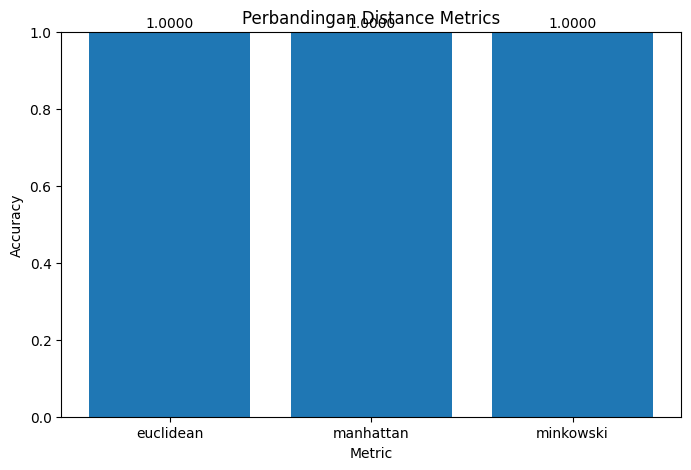

In [5]:
# Eksperimen dengan berbagai nilai K
k_values = range(1, 21, 2)
accuracy_scores = []
mse_scores = []

# Evaluasi untuk klasifikasi
for k in k_values:
    # Klasifikasi
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_class_scaled, y_train_class)
    y_pred = knn_clf.predict(X_test_class_scaled)
    accuracy_scores.append(accuracy_score(y_test_class, y_pred))
    
    # Regresi
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train_reg_scaled, y_train_reg)
    y_pred = knn_reg.predict(X_test_reg_scaled)
    mse_scores.append(mean_squared_error(y_test_reg, y_pred))

# Visualisasi hasil
plt.figure(figsize=(12, 5))

# Plot accuracy vs K
plt.subplot(121)
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs K (Classification)')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)

# Plot MSE vs K
plt.subplot(122)
plt.plot(k_values, mse_scores, marker='o', color='red')
plt.title('MSE vs K (Regression)')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Perbandingan distance metrics untuk klasifikasi
metrics = ['euclidean', 'manhattan', 'minkowski']
metric_scores = []

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train_class_scaled, y_train_class)
    y_pred = knn.predict(X_test_class_scaled)
    metric_scores.append(accuracy_score(y_test_class, y_pred))

# Plot perbandingan metrics
plt.figure(figsize=(8, 5))
plt.bar(metrics, metric_scores)
plt.title('Perbandingan Distance Metrics')
plt.xlabel('Metric')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
for i, v in enumerate(metric_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

## 3. Preprocessing Data untuk KNN

KNN sangat sensitif terhadap preprocessing data. Beberapa hal yang perlu diperhatikan:

### Scaling Features
- Wajib dilakukan karena KNN berbasis jarak
- Pilihan scaling:
  - StandardScaler
  - MinMaxScaler
  - RobustScaler

### Handling Categorical Features
1. **Label Encoding**
   - Untuk ordinal categories
   - Mempertahankan urutan

2. **One-Hot Encoding**
   - Untuk nominal categories
   - Mencegah false ordering

3. **Target Encoding**
   - Menggunakan rata-rata target
   - Cocok untuk high cardinality

Mari kita implementasikan preprocessing pada dataset dengan categorical features:

Hasil Evaluasi Model dengan Categorical Features:
--------------------------------------------------
MSE: 3321559572954.70
RMSE: 1822514.63
R² Score: -0.1191


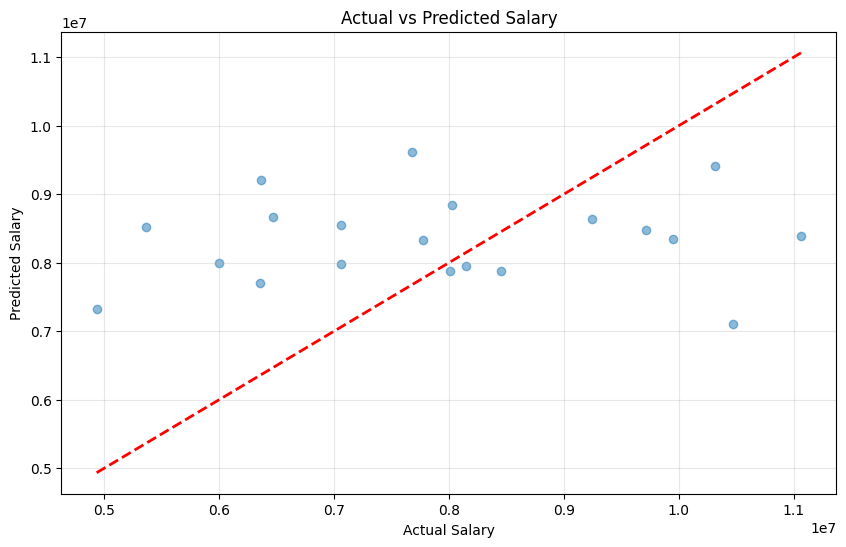


Korelasi Feature Numerik dengan Salary:
--------------------------------------------------
salary        1.000000
age           0.099314
experience    0.029662
Name: salary, dtype: float64


In [7]:
# Membuat dataset dengan categorical features
np.random.seed(42)
n_samples = 100

# Membuat data kategorik
categories = {
    'education': ['SMA', 'D3', 'S1', 'S2'],
    'city': ['Jakarta', 'Bandung', 'Surabaya', 'Yogyakarta'],
    'department': ['IT', 'HR', 'Finance', 'Marketing']
}

data = {
    'age': np.random.normal(30, 5, n_samples),
    'experience': np.random.normal(5, 2, n_samples),
    'education': np.random.choice(categories['education'], n_samples),
    'city': np.random.choice(categories['city'], n_samples),
    'department': np.random.choice(categories['department'], n_samples),
    'salary': np.random.normal(8000000, 2000000, n_samples)
}

df = pd.DataFrame(data)

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1. One-Hot Encoding untuk 'education', 'city', dan 'department'
ct = ColumnTransformer([
    ('onehot', OneHotEncoder(sparse_output=False), ['education', 'city', 'department'])
], remainder='passthrough')

# Persiapkan features dan target
X = df[['age', 'experience', 'education', 'city', 'department']]
y = df['salary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat pipeline
pipeline = Pipeline([
    ('preprocessor', ct),
    ('scaler', StandardScaler()),
    ('regressor', KNeighborsRegressor(n_neighbors=5))
])

# Fit dan prediksi
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Hasil Evaluasi Model dengan Categorical Features:")
print("-" * 50)
print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.4f}")

# Visualisasi actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.grid(True, alpha=0.3)
plt.show()

# Feature Importance Analysis
# Menggunakan korelasi untuk numerical features
numerical_corr = df[['age', 'experience', 'salary']].corr()['salary'].sort_values(ascending=False)

print("\nKorelasi Feature Numerik dengan Salary:")
print("-" * 50)
print(numerical_corr)

## 4. KNN untuk Berbagai Tipe Problem

KNN dapat digunakan untuk berbagai jenis masalah machine learning:

### 1. Classification
- Binary Classification
- Multi-class Classification
- Probabilistic Classification (dengan predict_proba)

### 2. Regression
- Single Target Regression
- Multiple Target Regression
- Weighted KNN Regression

### 3. Anomaly Detection
- Distance-based Outlier Detection
- Local Outlier Factor (LOF)

### 4. Missing Value Imputation
- KNN Imputer
- Weighted KNN Imputation

Mari kita implementasikan beberapa contoh:

## 5. Latihan

Gunakan dataset yang telah kita buat untuk menyelesaikan soal-soal berikut:

1. Implementasikan KNN dari awal (tanpa sklearn):
   - Hitung distance matrix
   - Implementasikan voting mechanism
   - Bandingkan dengan sklearn

2. Eksperimen dengan berbagai distance metrics:
   - Implementasikan custom metric
   - Bandingkan performa
   - Visualisasikan perbedaan

3. Implementasikan weighted KNN:
   - Gunakan distance-based weights
   - Implementasikan custom weighting
   - Bandingkan dengan regular KNN

4. Optimasi hyperparameter:
   - Implementasikan grid search
   - Gunakan cross-validation
   - Visualisasikan hasil

5. Aplikasikan KNN untuk anomaly detection:
   - Implementasikan outlier detection
   - Bandingkan dengan other methods
   - Visualisasikan hasil

Berikut adalah template kode untuk latihan:

In [9]:
# Template untuk latihan

# Soal 1: Implementasi KNN dari awal
class CustomKNN:
    def __init__(self, k=5, metric='euclidean'):
        self.k = k
        self.metric = metric
    
    def fit(self, X, y):
        # Lengkapi kode di sini...
        pass
    
    def predict(self, X):
        # Lengkapi kode di sini...
        pass

# Soal 2: Custom Distance Metric
def custom_distance(x1, x2):
    # Lengkapi kode di sini...
    pass

# Soal 3: Weighted KNN
class WeightedKNN:
    def __init__(self, k=5, weight_func=None):
        # Lengkapi kode di sini...
        pass

# Soal 4: Hyperparameter Optimization
def optimize_knn_params(X, y):
    # Lengkapi kode di sini...
    pass

# Soal 5: Anomaly Detection
def detect_anomalies(X, k=5):
    # Lengkapi kode di sini...
    pass

# Jalankan fungsi-fungsi di atas
# custom_knn = CustomKNN(k=5)
# distances = custom_distance(X1, X2)
# weighted_knn = WeightedKNN(k=5)
# best_params = optimize_knn_params(X, y)
# anomalies = detect_anomalies(X)